# **Bem-vindo ao mundo de dados!**



Essa análise é para você que possui curiosidade sobre os salários e características dos profissionais de dados mundo a fora.

Iremos explorar diversas questões: a taxa de trabalho remoto, o ano de trabalho, o tipo de contratação, nível de experiência, tamanho da empresa, e claro, o **salário!**

Vamos começar!?

#Bibliotecas

In [ ]:
#Bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

##  Cores

In [ ]:
sns.set_palette("crest")
sns.set_style("whitegrid")

# Importando o dataset

In [ ]:
#Importação do dataset através do github
ds_salaries = pd.read_csv("https://raw.githubusercontent.com/gustavo-candidoo/data-science/main/ds_salaries.csv")

##  Dicionário e link dos dados

Link para o dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

work_year: ano de trabalho


experience_level: nível de experiência (EN: Entry-Level, MI: Mid-Level,  SE: Senior-Level,  EX: Executive Level)


employment_type: tipo de de emprego (FT: Full-Time, CT: Contract-Time, PT: Part-Time, FL: Freelancer)


job_title: nome do cargo


salary: salário na moeda local


salary_currency: tipo de moeda do salário


salary_in_usd: salário convertido em dólar


employee_residence: local de moradia do empregado


remote_ratio: taxa de trabalho remoto


company_local: local da empresa


company_size: tamanho da empresa (S: small, M: medium, L: large)

# Explorando

In [ ]:
#análise inicial
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#amostra aleatória
ds_salaries.sample(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
126,126,2021,SE,FT,Machine Learning Scientist,120000,USD,120000,US,50,US,S
460,460,2022,MI,FT,Machine Learning Infrastructure Engineer,53000,EUR,58255,PT,50,PT,L
243,243,2021,SE,FT,Data Scientist,165000,USD,165000,US,100,US,L
306,306,2022,SE,FT,Data Analyst,116000,USD,116000,US,0,US,M
294,294,2022,MI,FT,Data Engineer,170000,USD,170000,US,100,US,M


In [ ]:
#verificando o tipo de cada coluna
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
#resumo estátistico
ds_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


##  Filtrando

In [ ]:
#podemos dropar algumas colunas que não serão interessantes na nossa análise
#droparemos o indíce, o local de moradia e da empresa, o salário e o tipo de moeda do salário, pois analisaremos somente quanto ganha em dólar
ds_salaries.drop(columns=['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence', 'company_location'], inplace = True)
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,S
2,2020,SE,FT,Big Data Engineer,109024,50,M
3,2020,MI,FT,Product Data Analyst,20000,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,L


In [ ]:
#verificando o tamanho
shape = ds_salaries.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 607 linhas e 7 colunas.


### Valores Missings

In [ ]:
#o dataset não possui missings
ds_salaries.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

#  Análise Exploratória

##  Análise Geral

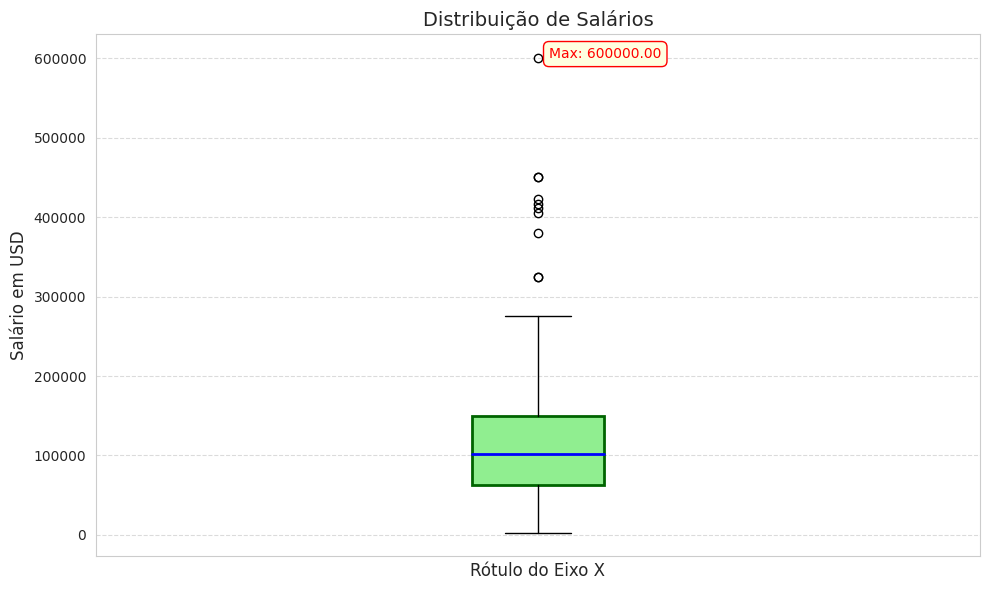

In [ ]:
box_color = 'lightgreen'
median_color = 'blue'
max_value_color = 'red'

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(ds_salaries['salary_in_usd'], patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor=box_color, linewidth=2, edgecolor='darkgreen')
for median in boxplot['medians']:
    median.set(color=median_color, linewidth=2)

plt.xlabel("Rótulo do Eixo X", fontsize=12)
plt.ylabel("Salário em USD", fontsize=12)
plt.title("Distribuição de Salários", fontsize=14)

plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([])

max_salary = ds_salaries['salary_in_usd'].max()

plt.annotate(f'Max: {max_salary:.2f}', xy=(1, max_salary), xytext=(8, 0),
             textcoords='offset points', fontsize=10, color=max_value_color,
             bbox=dict(boxstyle='round,pad=0.4', edgecolor=max_value_color, facecolor='lightyellow'))

plt.tight_layout()

plt.show()




1.   É possível perceber que a mediana dos salários é de 100.00USD, ou seja 50% das pessoas ganham acima disso e os outros 50%, abaixo.
2.   Há alguns valores outlier, porém um se destaca, que é de aproximadamente USD600.000. Podemos explorar e entender.
3. Há salários muito baixos em dólar. Provavelmente são de países subdesenvolvidos ou emergentes.


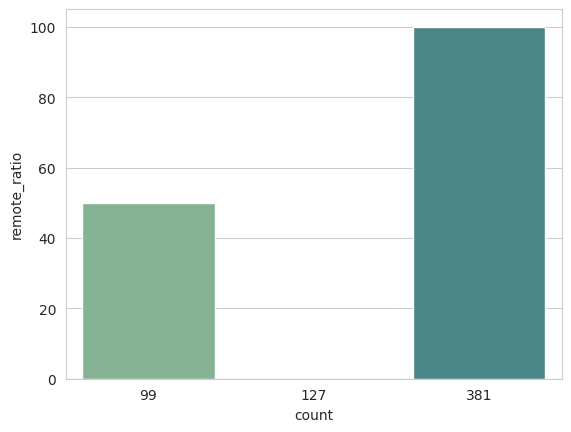

In [ ]:
#dataframe para contar quantas vezes os valores da coluna remote_ratio se repetem
remote_ratio_count = ds_salaries['remote_ratio'].value_counts()
remote_ratio_count = pd.DataFrame(remote_ratio_count).reset_index()
rename = ['remote_ratio', 'count']
remote_ratio_count.columns = rename

sns.barplot(
    data = remote_ratio_count,
    x = 'count',
    y = 'remote_ratio'
)
plt.show()

Percebe-se que a maioria dos indivíduos analisados adotam uma abordagem de trabalho remoto em tempo integral. Em contraste, uma parcela menor opta pelo modelo de trabalho presencial, correspondendo a 0% de home office. Uma porção intermediária dos participantes adota um modelo híbrido, dividindo igualmente suas responsabilidades entre trabalho presencial e remoto, totalizando 50%. Essa variedade de práticas reflete as diversas abordagens que as pessoas têm adotado em resposta às mudanças no ambiente de trabalho moderno.

### Outlier

In [ ]:
#explorando os outliers, valores acima de ~USD300.000
ds_salary_outlier = ds_salaries[ds_salaries['salary_in_usd'] > 300000]
ds_salary_outlier

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
25,2020,EX,FT,Director of Data Science,325000,100,L
33,2020,MI,FT,Research Scientist,450000,0,M
63,2020,SE,FT,Data Scientist,412000,100,L
97,2021,MI,FT,Financial Data Analyst,450000,100,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,50,L
225,2021,EX,CT,Principal Data Scientist,416000,100,S
252,2021,EX,FT,Principal Data Engineer,600000,100,L
482,2022,EX,FT,Data Engineer,324000,100,M
519,2022,SE,FT,Applied Data Scientist,380000,100,L
523,2022,SE,FT,Data Analytics Lead,405000,100,L


😱 Podemos ver que o responsável pelo salário de USD600.000 é um executivo e engenheiro de dados principal de uma empresa grande e trabalha 100% remoto.

💲 Enquanto os outros outliers também trabalham remotamente, em sua maioria, em empresas média e grandes. Quanto ao nível de experiência, é bem diversificado, com alguns mid-level e nenhum entry-level, mas predominando senior-level e executive-level.


##  Pergunta de negócio



*   Quais são os maiores salários? E os menores?
*   Durante os anos, o salários aumentou? Ou diminuiu?
*   Análise de correlação com o salário.
*   Como a proporção do trabalho remoto afetou o salário ao longo dos anos?



### Maiores e menores salários

In [ ]:
#agrupar por cargo e aplicar a mediana na coluna salário
ds_salaries_median = ds_salaries.groupby("job_title")['salary_in_usd'].median()
ds_salaries_median = pd.DataFrame(ds_salaries_median).reset_index()

In [ ]:
#filtrar os top10 maiores salários
top_10_salaries = ds_salaries_median.nlargest(10, 'salary_in_usd')
top_10_salaries.head(10)

,job_title,salary_in_usd
14,Data Analytics Lead,405000.0
28,Financial Data Analyst,275000.0
29,Head of Data,200000.0
45,Principal Data Engineer,200000.0
16,Data Architect,180000.0
2,Analytics Engineer,179850.0
46,Principal Data Scientist,173762.0
25,Director of Data Science,168000.0
23,Data Specialist,165000.0
3,Applied Data Scientist,157000.0


In [ ]:
#plot do gráfico com as 10 maiores médias salariais
fig = px.bar(top_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com maior média salarial'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

É possível perceber que os maiores salários são para cargos de gestão, o que não reflete muito bem a realidade, pois a maioria dos profissionais de dados estão no operacional. É necessário fazer uma análise mais prática e voltada para a massa.

In [ ]:
#filtrar os top10 menores salários
bottom_10_salaries = ds_salaries_median.nsmallest(10, 'salary_in_usd').sort_values(by='salary_in_usd', ascending=True)
bottom_10_salaries.head(10)

,job_title,salary_in_usd
0,3D Computer Vision Researcher,5409.0
47,Product Data Analyst,13036.0
10,Computer Vision Engineer,26304.5
43,NLP Engineer,37236.0
7,Big Data Engineer,41305.5
1,AI Scientist,45896.0
26,ETL Developer,54957.0
4,Applied Machine Learning Scientist,56700.0
39,Machine Learning Infrastructure Engineer,58255.0
20,Data Science Engineer,60000.0


In [ ]:
#plot do gráfico com as 10 menores médias salariais
fig = px.bar(bottom_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com menores médias salariais'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

Agora é possível ver uma análise mais realista, com profissões mais comuns praticadas por profissionais da área. No entanto, por ser mais frequente, existem diversos freelancers, o que ocasiona salários mais baixos, ao contrário dos cargos de gestão, em que são full time e em raros casos, outro tipo de contrato de trabalho, e como visto anteriormente, ter mais experiência é uma forte feature para o aumento de salário.

#### Análise salarial das 3 principais profissões

Como um profissional de dados na maioria dos casos será um analista, cientista ou engenheiro, podemos filtrar somente esses três cargos para fazer uma análise mais detalhada e voltada para realidade.

In [ ]:
#filtrar somente as três principais profissões
main_jobs = ["Data Scientist", "Data Analyst", "Data Engineer"]
ds_main_jobs = ds_salaries[ds_salaries['job_title'].isin(main_jobs)]

In [ ]:
#dataframe das três principais profissões
ds_main_jobs = pd.DataFrame(ds_main_jobs).reset_index()
ds_main_jobs.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,0,2020,MI,FT,Data Scientist,79833,0,L
1,5,2020,EN,FT,Data Analyst,72000,100,L
2,7,2020,MI,FT,Data Scientist,35735,50,L
3,10,2020,EN,FT,Data Scientist,51321,0,S
4,11,2020,MI,FT,Data Scientist,40481,0,L


In [ ]:
#mediana salarial das três principais profissões
ds_median_main_jobs = ds_main_jobs.groupby("job_title")['salary_in_usd'].median()
ds_median_main_jobs = pd.DataFrame(ds_median_main_jobs).reset_index()

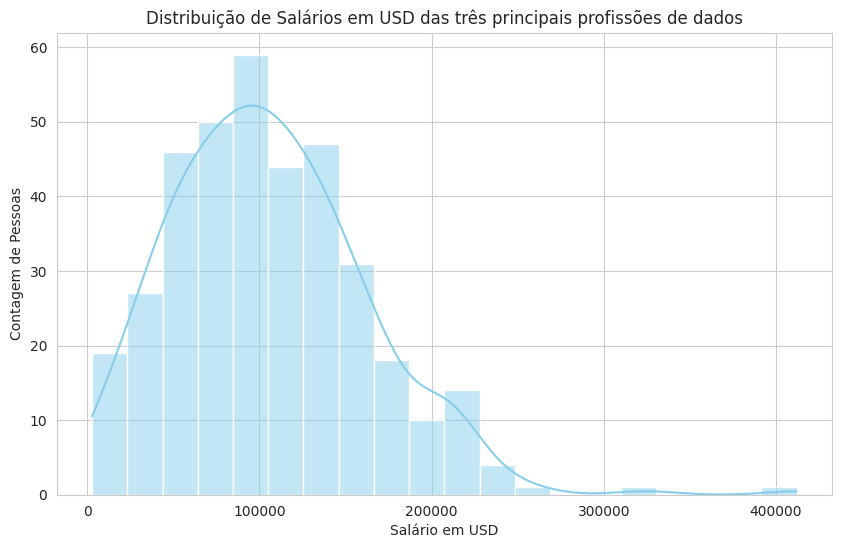

In [ ]:
#histograma do salário das três principais profissões
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=ds_main_jobs, x='salary_in_usd', bins=20, kde=True, color='skyblue')

plt.title('Distribuição de Salários em USD das três principais profissões de dados')
plt.xlabel('Salário em USD')
plt.ylabel('Contagem de Pessoas')

plt.show()

O histograma apresenta uma distribuição normal com forte concentração nos USD100.000, que é o salário médio das três profissões. Há diversos profissionais ganhando menos, provavelmente freelancers e colaboradores de empresas pequenas. E do outro lado, alguns outliers acima da média.

### Análise temporal do salário

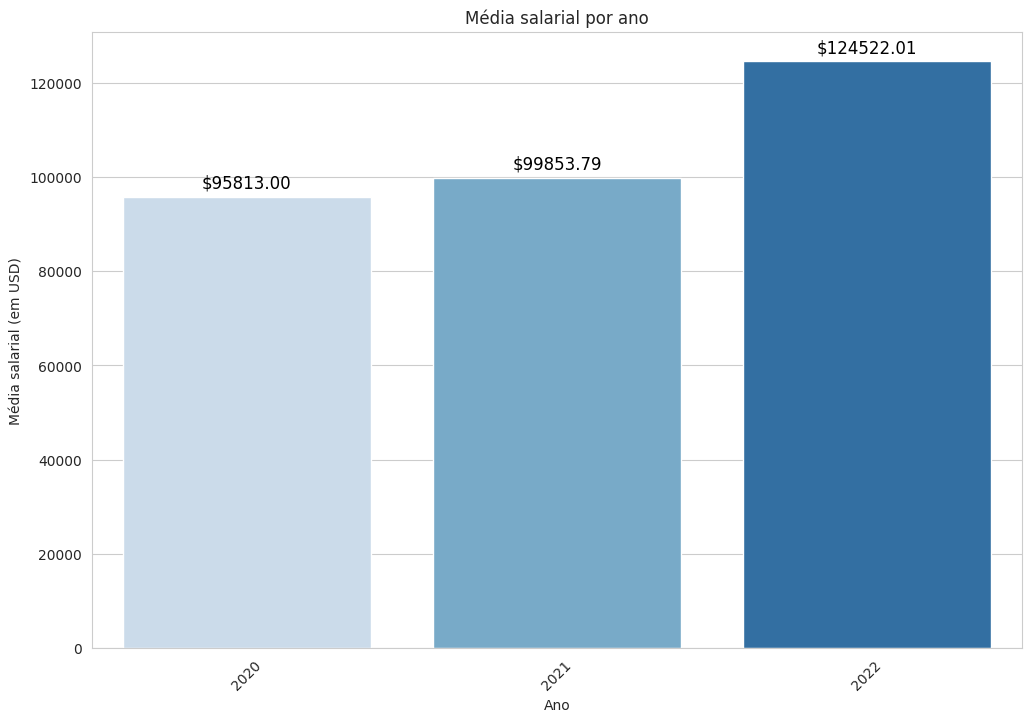

In [ ]:
#média salarial por ano
mean_salaries_work_year = ds_salaries.groupby("work_year")['salary_in_usd'].mean()
mean_salaries_work_year = pd.DataFrame(mean_salaries_work_year).reset_index()

#plot do gráfico
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=mean_salaries_work_year, x='work_year', y='salary_in_usd', palette='Blues')

for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.ylabel("Média salarial (em USD)")
plt.xlabel("Ano")
plt.title("Média salarial por ano")
plt.xticks(rotation=45)
plt.show()

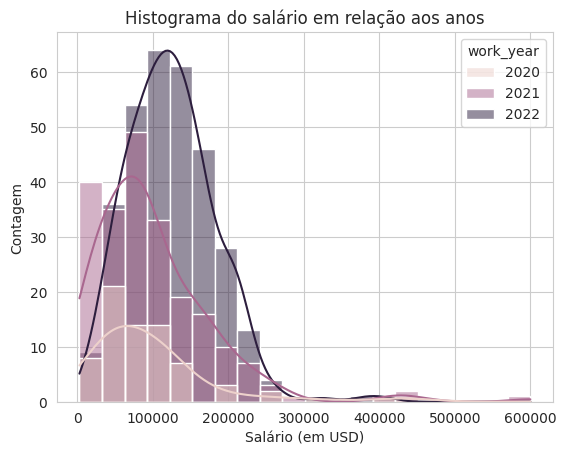

In [ ]:
#histograma do salário x contagem de salários por ano
sns.histplot(data=ds_salaries, x='salary_in_usd', hue='work_year', bins=20, kde=True, common_norm=False)

plt.title("Histograma do salário em relação aos anos")
plt.xlabel("Salário (em USD)")
plt.ylabel("Contagem")

plt.show()


Analisando o histograma salarial ao longo dos anos, é evidente um aumento médio de salários. Notavelmente, a diferença entre 2022 e 2021 é significativa, indicando uma melhoria substancial no mercado de trabalho. A transição de 2020 para 2021 mostrou uma diferença menor, sugerindo estabilidade nesse período.

### Análise de Correlação

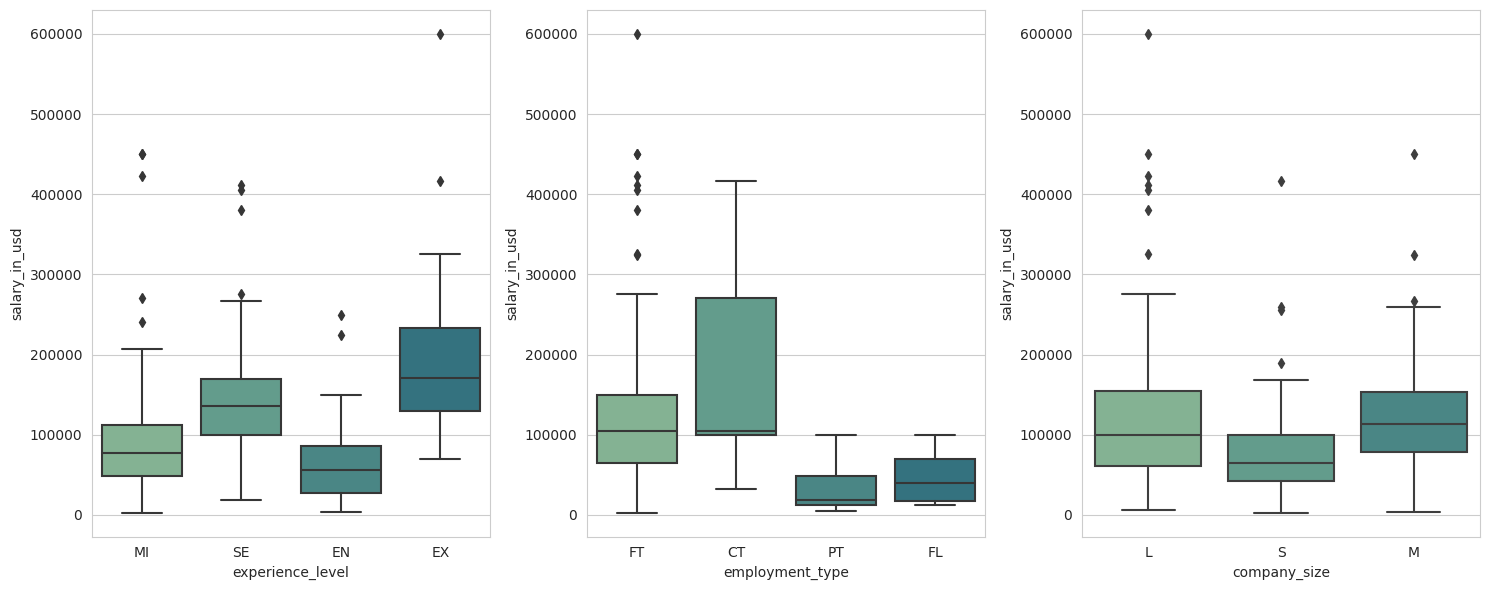

In [ ]:
#boxplot para verificar a relação do salário x features
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='experience_level', ax=ax[0])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='employment_type', ax=ax[1])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='company_size', ax=ax[2])
plt.tight_layout()

1. Salário e nível de experiência: É possível perceber que o salário tende aumentar conforme a qualifação aumenta, como era de se esperar. 50% dos profissionais entry-level ganham em torno de USD60.000, enquanto experienced-level ganham aproximadamente USD170.000.
2. Salário e tipo de emprego: Colabores full time e contract time possuem medianas parecidas, com uma dispersão muito maior de profissionais full time. Part time e free lance tendem a ganhar menos.
3. Salário e tamanho da empresa: Profissionais que trabalham em empresa de tamanho médio e grande tendem a ganhar salário parecidos. Já em empresa pequena, há uma queda no salário.

### Trabalho Remoto

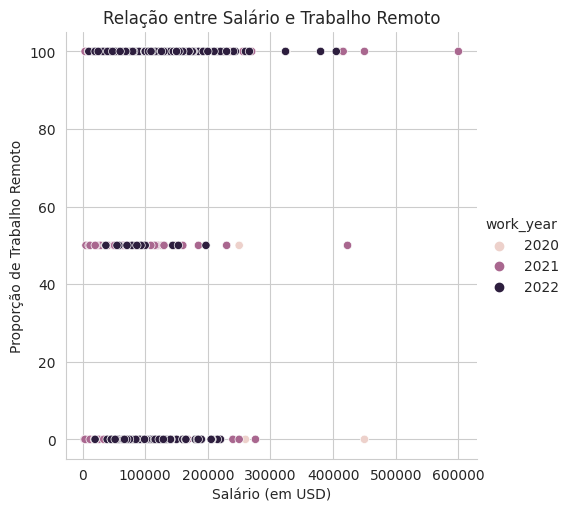

In [ ]:
#gráfico para verificar a relação entre a taxa de trabalho remoto, ano de trabalho e o salário.
ds_salaries_remote_year = ds_salaries.drop(columns=['experience_level', 'employment_type', 'job_title'])

sns.relplot(
    data=ds_salaries_remote_year,
    x='salary_in_usd',
    y='remote_ratio',
    hue='work_year'
)


plt.xlabel("Salário (em USD)")
plt.ylabel("Proporção de Trabalho Remoto")
plt.title("Relação entre Salário e Trabalho Remoto")

plt.show()

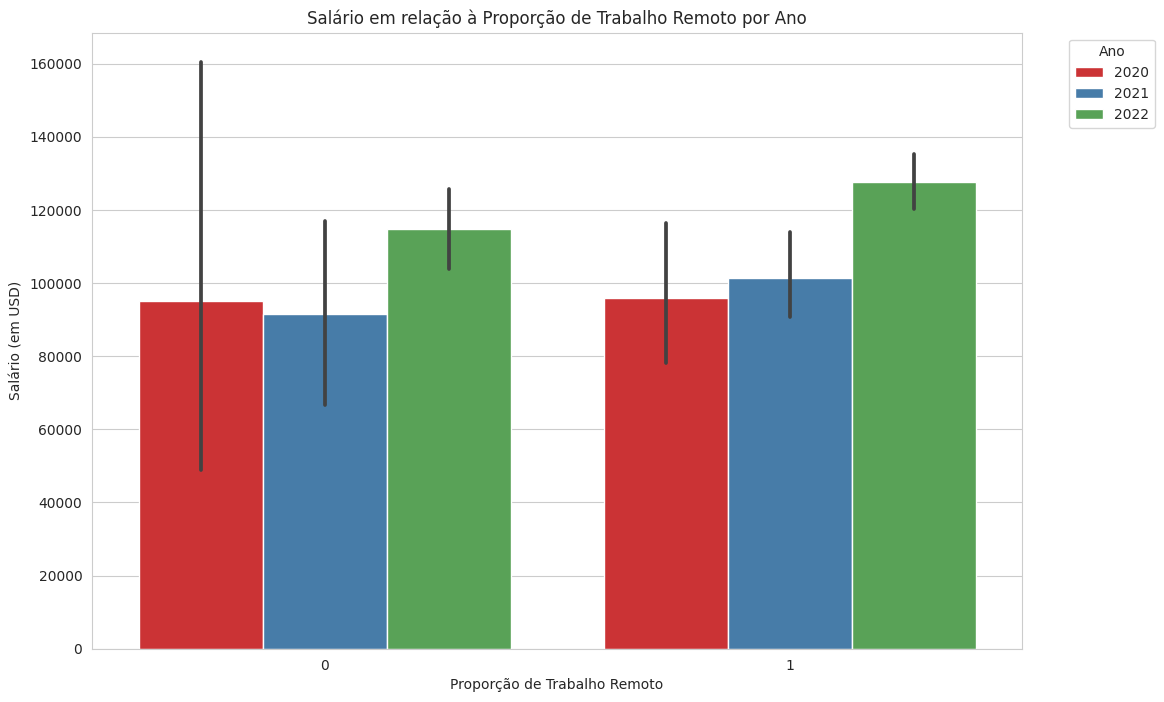

In [ ]:
#gráfico mais apresentável para verificar a relação entre trabalho remoto, ano de trabalho e salário
ds_salaries['remote_ratio'] = np.where(ds_salaries['remote_ratio'] > 0, 1, 0)

plt.figure(figsize=(12, 8))
sns.barplot(data=ds_salaries, x='remote_ratio', y='salary_in_usd', hue='work_year', palette='Set1')

plt.xlabel("Proporção de Trabalho Remoto")
plt.ylabel("Salário (em USD)")
plt.title("Salário em relação à Proporção de Trabalho Remoto por Ano")

plt.legend(title="Ano", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()

Em 2022, observamos o ano com a mais alta taxa de trabalho remoto, marcando um ponto alto nessa tendência. Esse aumento significativo representa uma notável mudança nas dinâmicas do mercado de trabalho em comparação a anos anteriores. No período de 2020 a 2022 houve uma notável crescente na adoção do trabalho remoto, refletindo a adaptação das empresas às novas realidades e demandas, assim como a busca por maior flexibilidade por parte dos profissionais. Essa transformação profunda está moldando a forma como as organizações operam e como os indivíduos conduzem suas carreiras.

# Conclusão

![Imagem de exemplo](https://blog.bighouseweb.com.br/wp-content/uploads/2022/01/Linguagens-de-programacao-1140x660.jpg)

**A análise revelou uma influência direta do salário de um profissional de dados em relação a todos os fatores considerados. Ficou evidente que as variáveis como experiência, tipo de emprego, título da função, ano e até mesmo a proporção de trabalho remoto têm um impacto considerável nas remunerações.**

**A média salarial de aproximadamente 100 mil dólares anuais para as principais profissões destaca a atratividade da carreira em ciência de dados, sendo uma recompensa justa pelo conjunto de habilidades exigido e pela capacidade de alavancar dados para tomar decisões estratégicas. Além disso, há uma demanda crescente na área.**

**A tendência crescente do trabalho remoto não passou despercebida. O aumento nas taxas de trabalho remoto ao longo dos anos mostra que a flexibilidade geográfica se tornou uma norma e uma expectativa crescente. Isso não apenas amplia as oportunidades para profissionais de dados, mas também está redefinindo a forma como as organizações estruturam suas operações e como os talentos buscam equilíbrio entre vida pessoal e profissional.**

**Em resumo, a carreira em ciência de dados é recompensadora e dinâmica, com salários atraentes e uma forte tendência de trabalho remoto. Aqueles que buscam essa área estão em uma posição privilegiada para moldar o futuro dos negócios e da tecnologia por meio da análise de dados.**